In [1]:
import pandas as pd
from pandas.core.dtypes.common import is_numeric_dtype
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('dataset/ravdess_features.csv')
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,...,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,...,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,...,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [3]:
df.shape

(2452, 38)

In [4]:
df.dtypes

modality                object
vocal_channel           object
emotion                 object
emotional_intensity     object
statement               object
repetition              object
actor                  float64
sex                     object
channels                 int64
sample_width             int64
frame_rate               int64
frame_width              int64
length_ms                int64
frame_count            float64
intensity              float64
zero_crossings_sum       int64
mfcc_mean              float64
mfcc_std               float64
mfcc_min               float64
mfcc_max               float64
sc_mean                float64
sc_std                 float64
sc_min                 float64
sc_max                 float64
sc_kur                 float64
sc_skew                float64
stft_mean              float64
stft_std               float64
stft_min               float64
stft_max               float64
stft_kur               float64
stft_skew              float64
mean    

In [5]:
# info su colonne con attributi numerici
for column in df.columns:
    if is_numeric_dtype(df[column]):
        print('\n{}:'.format(column.upper()))
        print('\t Mean = {:.3f}'.format(df[column].mean()))
        print('\t Standard deviation = {:.3f}'.format(df[column].std()))
        print('\t Minimum = {:.3f}'.format(df[column].min()))
        print('\t Maximum = {:.3f}'.format(df[column].max()))


ACTOR:
	 Mean = 12.582
	 Standard deviation = 6.916
	 Minimum = 1.000
	 Maximum = 24.000

CHANNELS:
	 Mean = 1.002
	 Standard deviation = 0.049
	 Minimum = 1.000
	 Maximum = 2.000

SAMPLE_WIDTH:
	 Mean = 2.000
	 Standard deviation = 0.000
	 Minimum = 2.000
	 Maximum = 2.000

FRAME_RATE:
	 Mean = 48000.000
	 Standard deviation = 0.000
	 Minimum = 48000.000
	 Maximum = 48000.000

FRAME_WIDTH:
	 Mean = 2.005
	 Standard deviation = 0.099
	 Minimum = 2.000
	 Maximum = 4.000

LENGTH_MS:
	 Mean = 4092.151
	 Standard deviation = 598.322
	 Minimum = 2936.000
	 Maximum = 6373.000

FRAME_COUNT:
	 Mean = 193587.188
	 Standard deviation = 36825.369
	 Minimum = -1.000
	 Maximum = 305906.000

INTENSITY:
	 Mean = -37.625
	 Standard deviation = 8.452
	 Minimum = -63.865
	 Maximum = -16.354

ZERO_CROSSINGS_SUM:
	 Mean = 12885.314
	 Standard deviation = 3665.320
	 Minimum = 4721.000
	 Maximum = 30153.000

MFCC_MEAN:
	 Mean = -28.769
	 Standard deviation = 4.462
	 Minimum = -43.813
	 Maximum = -15.491

M

In [6]:
# info su colonne con attributi non-numerici
for column in df.columns:
    if not is_numeric_dtype(df[column]):
        print('\n{}:'.format(column.upper()))
        print(df[column].value_counts())


MODALITY:
audio-only    2452
Name: modality, dtype: int64

VOCAL_CHANNEL:
speech    1335
song       921
Name: vocal_channel, dtype: int64

EMOTION:
fearful      376
angry        376
happy        376
calm         376
sad          376
surprised    192
disgust      192
neutral      188
Name: emotion, dtype: int64

EMOTIONAL_INTENSITY:
normal    1320
strong    1132
Name: emotional_intensity, dtype: int64

STATEMENT:
Dogs are sitting by the door    1226
Kids are talking by the door    1226
Name: statement, dtype: int64

REPETITION:
2nd    1226
1st    1226
Name: repetition, dtype: int64

SEX:
M    1248
F    1204
Name: sex, dtype: int64


# Drop of features with only one value

In [7]:
for attr in df.columns:
    if len(df[attr].unique())==1:
        df = df.drop(attr, axis=1)
        print(f'{attr} is dropped')
df.shape

modality is dropped
sample_width is dropped
frame_rate is dropped
stft_max is dropped


(2452, 34)

In [8]:
to_fill = [column for column in df.columns if df[column].isna().any()]
to_fill

['vocal_channel', 'actor', 'intensity']

## channels vs frame_width

In [9]:
df['channels'].value_counts()

1    2446
2       6
Name: channels, dtype: int64

In [10]:
df['frame_width'].value_counts()

2    2446
4       6
Name: frame_width, dtype: int64

In [11]:
# entrambe colonne poco utili, da cancellare
df = df.drop(['channels', 'frame_width'], axis=1)
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,length_ms,frame_count,intensity,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,3737,179379.0,-36.793432,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,3904,187387.0,NaN,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,4671,224224.0,-32.290737,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,3637,174575.0,-49.019839,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,4404,211411.0,-31.214503,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


# Missing values of non-numerical attributes

In [12]:
# attributi non-numerici (e quindi da mappare)
to_map = [column for column in df.columns if not is_numeric_dtype(df[column])]
to_map

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex']

In [13]:
# attributi non-numerici con valori mancanti
to_fill = [column for column in to_map if df[column].isna().any()]
to_fill

['vocal_channel']

## vocal_channel

In [14]:
# stampa valori per vocal_channel
def print_vocal_channel_info():
    speech_count = len(df[df['vocal_channel'] == 'speech'])
    song_count = len(df[df['vocal_channel'] == 'song'])
    nan_count = df['vocal_channel'].isnull().sum()
    print(f'speech: {speech_count}\nsong: {song_count}\nNaN: {nan_count}')

print_vocal_channel_info()

speech: 1335
song: 921
NaN: 196


### speech values have two more emotions (disgust and surprised)

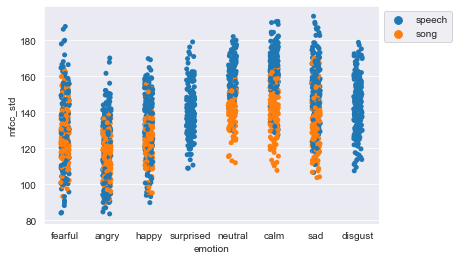

In [15]:
sns.stripplot(data=df, x='emotion', y='mfcc_std', hue='vocal_channel')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [16]:
mask = df['vocal_channel'].isna() & ((df['emotion'] == 'disgust') | (df['emotion'] == 'surprised'))
df.loc[mask, 'vocal_channel'] = df.loc[mask, 'vocal_channel'].fillna('speech')
print_vocal_channel_info()

speech: 1359
song: 921
NaN: 172


### Mean analysis

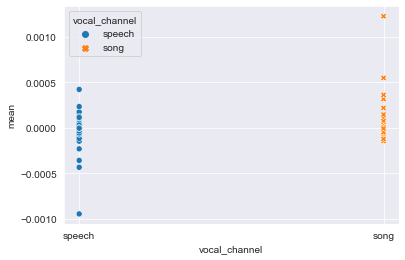

In [17]:
sns.scatterplot(data=df, x='vocal_channel', y='mean', hue='vocal_channel', style='vocal_channel')
plt.show()

In [18]:
def _analyze(dataframe, attr_to_compare, value, quantile_low, quantile_high):

    df_fixed_vc_value = dataframe[dataframe['vocal_channel'] == value]

    mean = df_fixed_vc_value[attr_to_compare].mean()
    std = df_fixed_vc_value[attr_to_compare].std()
    print(f'{value} mean: {mean:.3}\n{value} std: {std:.3}')

    low = df_fixed_vc_value[attr_to_compare].quantile(quantile_low)
    high = df_fixed_vc_value[attr_to_compare].quantile(quantile_high)
    filtered = df_fixed_vc_value[(df_fixed_vc_value[attr_to_compare] < high) &
                                 (df_fixed_vc_value[attr_to_compare] > low)]

    return high, low, filtered


def vocal_channel_analysis(attr_to_compare, **kwargs):
    assert 4 <= len(kwargs) <= 5

    speech_quantile_low = speech_quantile_high = song_quantile_low = song_quantile_high = emotion_value = None
    filter_by_emotion = False

    for key, value in kwargs.items():
        if key == 'speech_quantile_low':
            speech_quantile_low = value
        elif key == 'speech_quantile_high':
            speech_quantile_high = value
        elif key == 'song_quantile_low':
            song_quantile_low = value
        elif key == 'song_quantile_high':
            song_quantile_high = value
        elif key == 'filter_by_emotion':
            filter_by_emotion = True
            emotion_value = value

    if speech_quantile_low is None or speech_quantile_high is None \
        or song_quantile_low is None or song_quantile_high is None:
        raise Exception('missing one or more quantiles')

    dataframe = df if not filter_by_emotion else df[df['emotion'] == emotion_value]

    sp_high, sp_low, sp_filtered = _analyze(dataframe, attr_to_compare, 'speech',
                                            speech_quantile_low, speech_quantile_high)
    so_high, so_low, so_filtered = _analyze(dataframe, attr_to_compare, 'song',
                                            song_quantile_low, song_quantile_high)

    filtered = pd.concat([sp_filtered, so_filtered])
    sns.histplot(data=filtered, x=attr_to_compare, hue='vocal_channel', kde=True)

    result = {'speech_high': sp_high, 'speech_low': sp_low, 'speech_filtered': sp_filtered,
           'song_high': so_high, 'song_low': so_low, 'song_filtered': so_filtered}

    return result

speech mean: -3.53e-07
speech std: 3.7e-05
song mean: 1.42e-06
song std: 5.07e-05


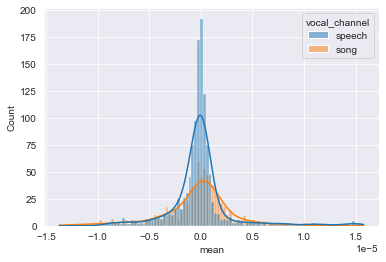

In [19]:
res = vocal_channel_analysis('mean', speech_quantile_low=0.05, speech_quantile_high=0.95,
                             song_quantile_low=0.05, song_quantile_high=0.95)

### Intensity analysis

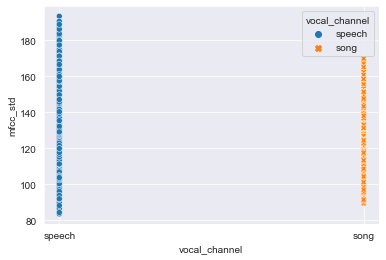

In [20]:
sns.scatterplot(data=df, x='vocal_channel', y='mfcc_std', hue='vocal_channel', style='vocal_channel')
plt.show()

speech mean: 1.42e+02
speech std: 21.7
song mean: 1.3e+02
song std: 15.5


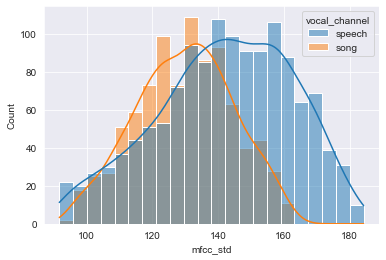

In [21]:
res = vocal_channel_analysis('mfcc_std', speech_quantile_low=0.01, speech_quantile_high=0.99,
                             song_quantile_low=0.01, song_quantile_high=0.99)

In [22]:
def fill_vocal_channel_values(attr_to_compare, res_dict, x, **kwargs):
    assert len(kwargs) <= 1

    value = 'song' if x.rsplit('_')[0] == 'speech' else 'speech'
    filter_by_emotion, emotion_value, _mask = False, None, None

    for key, val in kwargs.items():
        if key == 'filter_by_emotion':
            filter_by_emotion = True
            emotion_value = val

    if x.endswith('low') and filter_by_emotion:
        _mask = (df['vocal_channel'].isna()) & (df[attr_to_compare] < res_dict[x]) & (df['emotion'] == emotion_value)
    elif x.endswith('low'):
        _mask = (df['vocal_channel'].isna()) & (df[attr_to_compare] < res_dict[x])
    elif x.endswith('high') and filter_by_emotion:
        _mask = (df['vocal_channel'].isna()) & (df[attr_to_compare] > res_dict[x]) & (df['emotion'] == emotion_value)
    else:
        _mask = (df['vocal_channel'].isna()) & (df[attr_to_compare] > res_dict[x])

    df.loc[_mask, 'vocal_channel'] = df.loc[_mask, 'vocal_channel'].fillna(value)

In [23]:
fill_vocal_channel_values('mfcc_std', res, 'song_high')
print_vocal_channel_info()

speech: 1374
song: 921
NaN: 157


### length_ms analysis

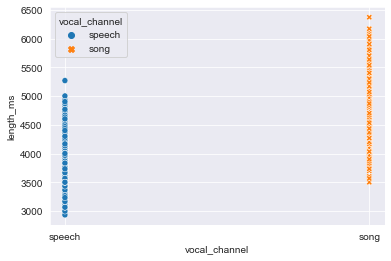

In [24]:
sns.scatterplot(data=df, x='vocal_channel', y='length_ms', hue='vocal_channel', style='vocal_channel')
plt.show()

speech mean: 3.7e+03
speech std: 3.39e+02
song mean: 4.65e+03
song std: 4.19e+02


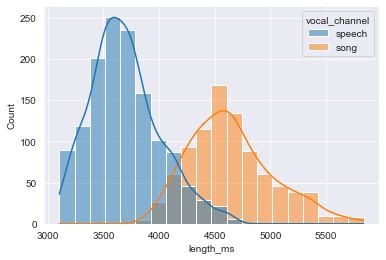

In [25]:
res = vocal_channel_analysis('length_ms', speech_quantile_low=0.01, speech_quantile_high=0.99,
                             song_quantile_low=0.01, song_quantile_high=0.99)

In [26]:
fill_vocal_channel_values('length_ms', res, 'song_low')
fill_vocal_channel_values('length_ms', res, 'speech_high')

print_vocal_channel_info()

speech: 1421
song: 952
NaN: 79


### sc_mean analysis

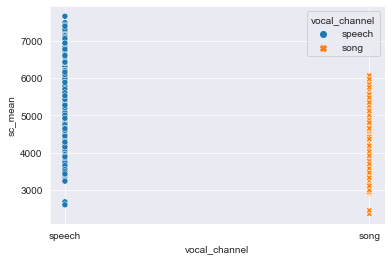

In [27]:
sns.scatterplot(data=df, x='vocal_channel', y='sc_mean', hue='vocal_channel', style='vocal_channel')
plt.show()

speech mean: 5.57e+03
speech std: 8.08e+02
song mean: 4.6e+03
song std: 6.3e+02


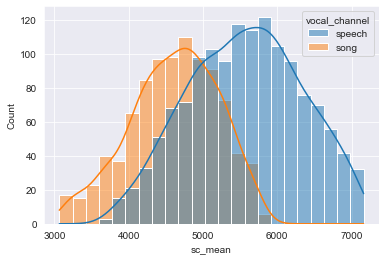

In [28]:
res = vocal_channel_analysis('sc_mean', speech_quantile_low=0.01, speech_quantile_high=0.99,
                             song_quantile_low=0.01, song_quantile_high=0.99)

In [29]:
fill_vocal_channel_values('sc_mean', res, 'song_high')
fill_vocal_channel_values('sc_mean', res, 'speech_low')

print_vocal_channel_info()

speech: 1429
song: 957
NaN: 66


### stft_mean analysis

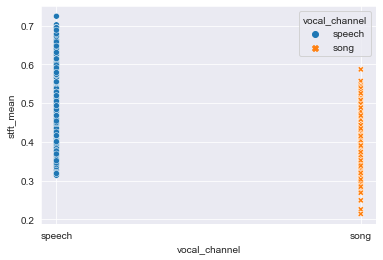

In [30]:
sns.scatterplot(data=df, x='vocal_channel', y='stft_mean', hue='vocal_channel', style='vocal_channel')
plt.show()

speech mean: 0.51
speech std: 0.0784
song mean: 0.427
song std: 0.0606


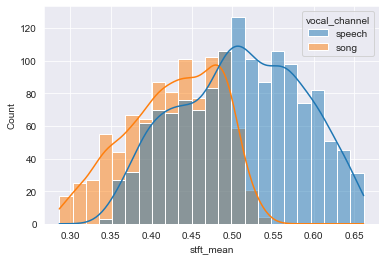

In [31]:
res = vocal_channel_analysis('stft_mean', speech_quantile_low=0.01, speech_quantile_high=0.99,
                             song_quantile_low=0.01, song_quantile_high=0.99)

In [32]:
fill_vocal_channel_values('stft_mean', res, 'song_high')
fill_vocal_channel_values('stft_mean', res, 'speech_low')

print_vocal_channel_info()

speech: 1433
song: 963
NaN: 56


### frame_count analysis

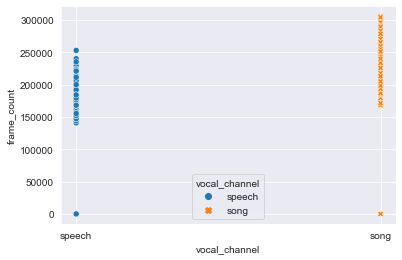

In [33]:
sns.scatterplot(data=df, x='vocal_channel', y='frame_count', hue='vocal_channel', style='vocal_channel')
plt.show()

speech mean: 1.75e+05
speech std: 2.54e+04
song mean: 2.2e+05
song std: 3.44e+04


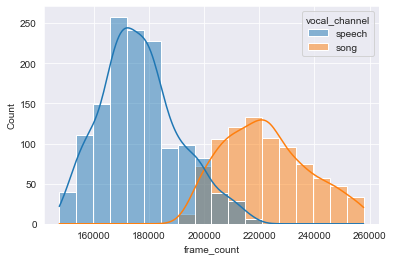

In [34]:
res = vocal_channel_analysis('frame_count', speech_quantile_low=0.02, speech_quantile_high=0.98,
                             song_quantile_low=0.05, song_quantile_high=0.95)

In [35]:
fill_vocal_channel_values('frame_count', res, 'song_low')
fill_vocal_channel_values('frame_count', res, 'speech_high')

print_vocal_channel_info()

speech: 1443
song: 975
NaN: 34


### Group by emotion: length_ms

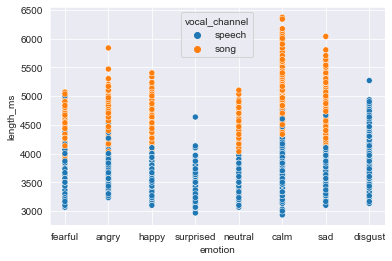

In [36]:
filt_nan = df[df['vocal_channel'].isna()]
sns.scatterplot(data=df, x='emotion', y='length_ms', hue='vocal_channel')
plt.show()

#### Fearful

speech mean: 3.57e+03
speech std: 2.92e+02
song mean: 4.36e+03
song std: 3.17e+02


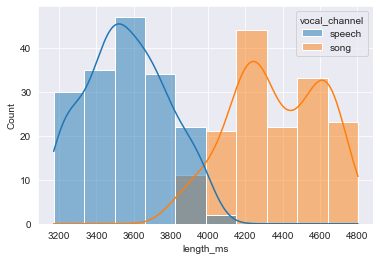

In [37]:
# restricted dataframe, only with data for which emotion is equal to fearful
res = vocal_channel_analysis('length_ms', speech_quantile_low=0.05, speech_quantile_high=0.95,
                             song_quantile_low=0.05, song_quantile_high=0.95, filter_by_emotion='fearful')

In [38]:
fill_vocal_channel_values('length_ms', res, 'speech_high', filter_by_emotion='fearful')
fill_vocal_channel_values('length_ms', res, 'song_low', filter_by_emotion='fearful')

print_vocal_channel_info()

speech: 1443
song: 984
NaN: 25


#### Sad

speech mean: 3.69e+03
speech std: 2.94e+02
song mean: 4.86e+03
song std: 3.96e+02


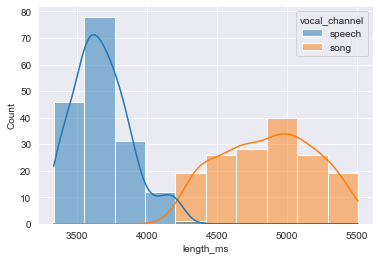

In [39]:
res = vocal_channel_analysis('length_ms', speech_quantile_low=0.05, speech_quantile_high=0.95,
                             song_quantile_low=0.05, song_quantile_high=0.95, filter_by_emotion='sad')

In [40]:
fill_vocal_channel_values('length_ms', res, 'speech_high', filter_by_emotion='sad')
fill_vocal_channel_values('length_ms', res, 'song_low', filter_by_emotion='sad')

print_vocal_channel_info()

speech: 1443
song: 987
NaN: 22


#### Happy

speech mean: 3.64e+03
speech std: 2.57e+02
song mean: 4.55e+03
song std: 2.86e+02


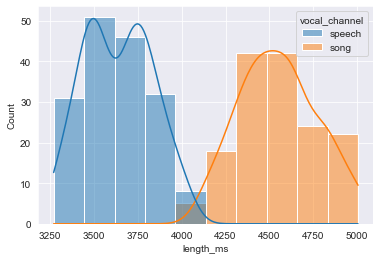

In [41]:
res = vocal_channel_analysis('length_ms', speech_quantile_low=0.05, speech_quantile_high=0.95,
                             song_quantile_low=0.05, song_quantile_high=0.95, filter_by_emotion='happy')

In [42]:
fill_vocal_channel_values('length_ms', res, 'speech_high', filter_by_emotion='happy')
fill_vocal_channel_values('length_ms', res, 'song_low', filter_by_emotion='happy')

print_vocal_channel_info()

speech: 1443
song: 995
NaN: 14


#### Neutral

speech mean: 3.5e+03
speech std: 2.12e+02
song mean: 4.52e+03
song std: 2.55e+02


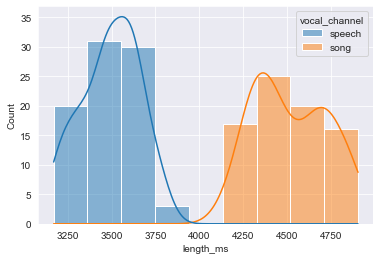

In [43]:
res = vocal_channel_analysis('length_ms', speech_quantile_low=0.05, speech_quantile_high=0.95,
                             song_quantile_low=0.05, song_quantile_high=0.95, filter_by_emotion='neutral')

In [44]:
fill_vocal_channel_values('length_ms', res, 'speech_high', filter_by_emotion='neutral')
fill_vocal_channel_values('length_ms', res, 'song_low', filter_by_emotion='neutral')

print_vocal_channel_info()

speech: 1443
song: 999
NaN: 10


#### Angry

speech mean: 3.87e+03
speech std: 3.1e+02
song mean: 4.53e+03
song std: 3.14e+02


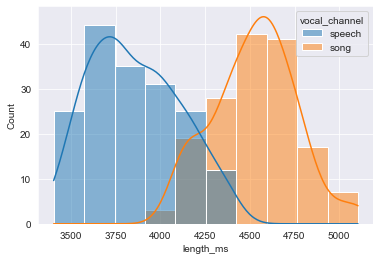

In [45]:
res = vocal_channel_analysis('length_ms', speech_quantile_low=0.05, speech_quantile_high=0.95,
                             song_quantile_low=0.05, song_quantile_high=0.95, filter_by_emotion='angry')

In [46]:
fill_vocal_channel_values('length_ms', res, 'speech_high', filter_by_emotion='angry')
fill_vocal_channel_values('length_ms', res, 'song_low', filter_by_emotion='angry')

print_vocal_channel_info()

speech: 1443
song: 1003
NaN: 6


#### Calm

speech mean: 3.79e+03
speech std: 3.34e+02
song mean: 5.04e+03
song std: 4.46e+02


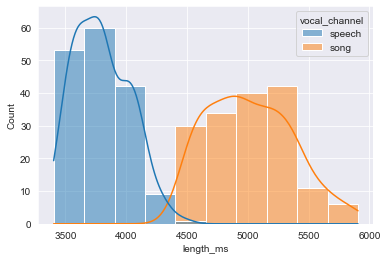

In [47]:
res = vocal_channel_analysis('length_ms', speech_quantile_low=0.05, speech_quantile_high=0.95,
                             song_quantile_low=0.05, song_quantile_high=0.95, filter_by_emotion='calm')

In [48]:
fill_vocal_channel_values('length_ms', res, 'speech_high', filter_by_emotion='angry')
fill_vocal_channel_values('length_ms', res, 'song_low', filter_by_emotion='angry')

print_vocal_channel_info()

speech: 1444
song: 1003
NaN: 5


#### Remaining values filled with mode

In [49]:
df['vocal_channel'] = df['vocal_channel'].fillna(df['vocal_channel'].mode()[0])
print_vocal_channel_info()

speech: 1449
song: 1003
NaN: 0


# Missing values of numerical attributes

In [50]:
to_fill = [column for column in df.columns if is_numeric_dtype(df[column]) and df[column].isna().any()]
to_fill

['actor', 'intensity']

In [51]:
print('Missing values of actor: {}'.format(df['actor'].isna().sum()))

Missing values of actor: 1126


In [52]:
df = df.drop('actor', axis=1)
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,frame_count,intensity,zero_crossings_sum,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,3737,179379.0,-36.793432,16995,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,3904,187387.0,NaN,13906,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,song,happy,strong,Dogs are sitting by the door,2nd,F,4671,224224.0,-32.290737,18723,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,3637,174575.0,-49.019839,11617,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,4404,211411.0,-31.214503,15137,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


# Outliers

In [53]:
for column in ['std', 'min', 'max', 'sc_kur']:
    if column == 'min':
        df[column] = -df[column]
        df[f'log{column}'] = np.log(df[column])
    elif column == 'sc_kur':
        df[column] = df[column] - df[column].min()
        df[f'log{column}'] = np.log(df[column][df[column] != 0])
    else:
        df[f'log{column}'] = np.log(df[column])

In [54]:
df['outliers'] = 0

### Quantile

In [55]:
# select attributes that doesn't have a normal distribution
attr_to_quantile=['sc_max', 'kur', 'frame_count', 'sc_min', 'sc_max', 'stft_kur', 'kur', 'mean']

In [56]:
# use 0.3% to simulate the 3-sigma rule
for attr in attr_to_quantile:
    low_std = df[attr].quantile(0.0015)   # quantiles correspond to 0.3%
    high_std = df[attr].quantile(0.9985)
    if len(df[(df[attr] < low_std) | (df[attr] > high_std)]) > 0:
        df.loc[(df[attr] < low_std) | (df[attr] > high_std), 'outliers'] = df['outliers'] + 1

In [57]:
len(df[df['outliers'] > 0])

38

### 3-sigma

In [58]:
#Select attributes with normal distribution
attr_to_sigma=[ 'intensity','zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min',\
              'mfcc_max', 'sc_mean', 'sc_std', 'logsc_kur', 'sc_skew', 'stft_mean',\
              'stft_skew', 'stft_std', 'logstd', 'logmin', 'logmax', 'skew']

In [59]:
#Use the 3-sigma rule
for attr in attr_to_sigma:
    df[attr] = (df[attr] - df[attr].mean()) / df[attr].std()
    if len(df[(df[attr] < -3) | (df[attr] > 3)]) > 0:
        df.loc[(df[attr] < -3) | (df[attr] > 3), 'outliers'] = df['outliers'] + 1

In [60]:
len(df[df['outliers'] > 0])

127

In [61]:
# drop rows with more than 2 outliers
df = df.drop(df[df['outliers'] >= 2].index, axis=0)

# drop the log-column used and the outliers column
to_drop = ['outliers']
for column in df.columns:
    if column.startswith('log'):
        to_drop.append(column)

df = df.drop(to_drop, axis=1)

In [62]:
print('Number of rows after discarding outliers = %d' % (df.shape[0]))

Number of rows after discarding outliers = 2421


# Analysis of high correlated features

In [63]:
def box_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    mask = (series < q1 - 1.5 * iqr) | (series > q3 + 1.5 * iqr)
    series = series[mask]
    return series

In [64]:
def outliers(column_box, by_box):
    data_outliers = pd.DataFrame([])
    for i in df[by_box].unique():
        df_outlier = df.copy().sort_values([by_box])
        df_outlier = df_outlier.loc[df_outlier[by_box] == i, :].reset_index(drop=True)
        df_outlier = df_outlier[[by_box, column_box]].set_index(by_box).apply(box_outliers)
        df_outlier = df_outlier.reset_index()
        data_outliers = pd.concat([data_outliers, df_outlier], axis=0)
    return data_outliers

In [65]:
numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]
corr_pairs = []

for column_i in numeric_attr_list:
    for column_j in numeric_attr_list:
        if column_i != column_j and abs(df[column_i].corr(df[column_j])) > 0.95 and \
                sorted([column_i, column_j]) not in corr_pairs:
            corr_pairs.append(sorted([column_i, column_j]))

corr_pairs

[['intensity', 'mfcc_std'],
 ['intensity', 'mfcc_min'],
 ['mfcc_min', 'mfcc_std'],
 ['stft_mean', 'stft_skew'],
 ['min', 'std'],
 ['max', 'std'],
 ['max', 'min']]

## intensity vs mfcc_min vs mfcc_std

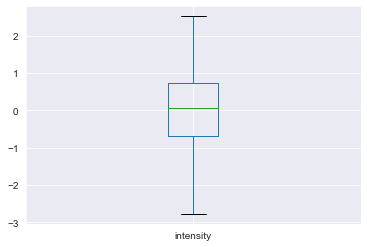

intensity has 0 box_outliers


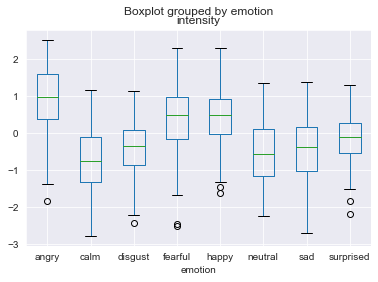

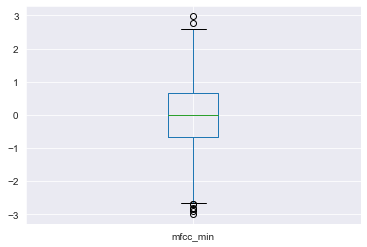

mfcc_min has 8 box_outliers


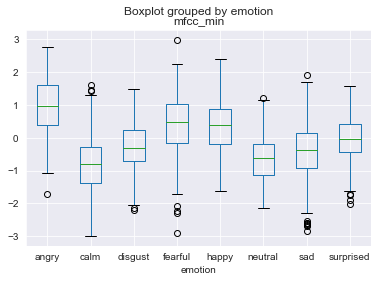

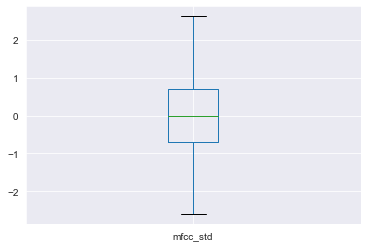

mfcc_std has 0 box_outliers


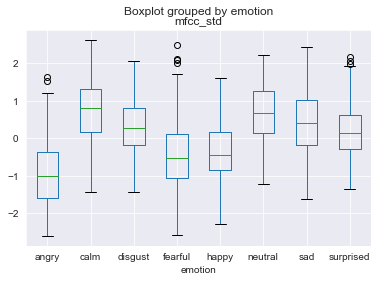

In [66]:
for column in ['intensity', 'mfcc_min','mfcc_std']:
    df.boxplot(column=[column])
    plt.show()
    n=len(box_outliers(df[column]))
    print(f'{column} has {n} box_outliers')
    df.boxplot(column=[column], by='emotion')
    plt.show()
    outliers(column, 'emotion')

In [67]:
# mfcc_std è quella con meno outliers, e intensity ha anche dei valori mancanti
# to_drop.append('intensity') not dropped for future regression
to_drop = ['mfcc_min']

## stft_mean vs stft_skew

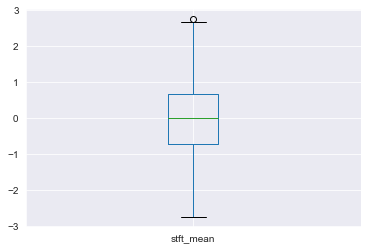

stft_mean has 1 box_outliers


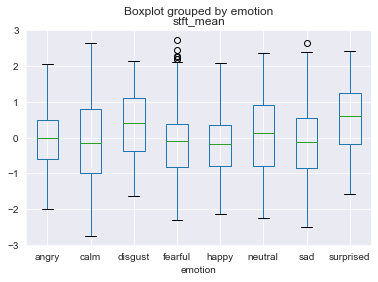

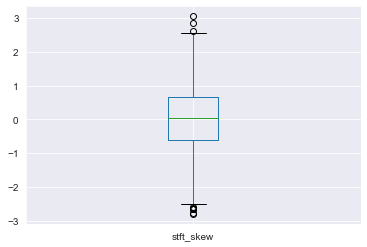

stft_skew has 10 box_outliers


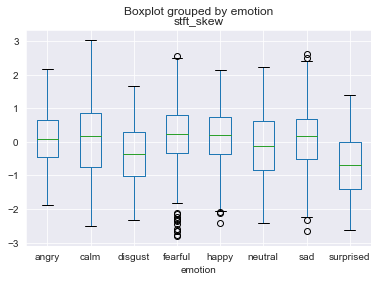

In [68]:
for column in ['stft_mean', 'stft_skew']:
    df.boxplot(column=[column])
    plt.show()
    n=len(box_outliers(df[column]))
    print(f'{column} has {n} box_outliers')
    df.boxplot(column=[column], by='emotion')
    plt.show()
    outliers(column, 'emotion')

In [69]:
to_drop.append('stft_skew')

## min vs max vs std

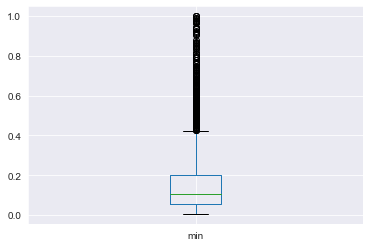

min has 205 box_outliers


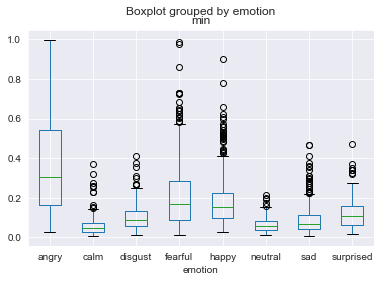

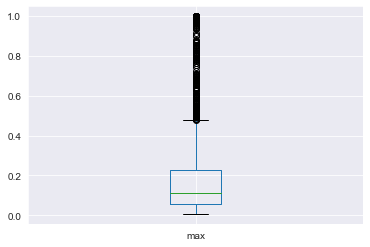

max has 202 box_outliers


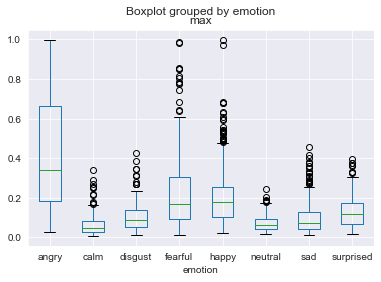

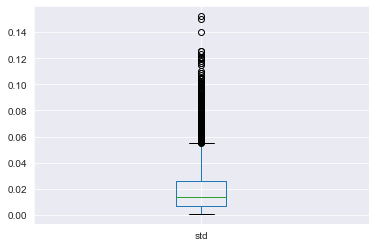

std has 170 box_outliers


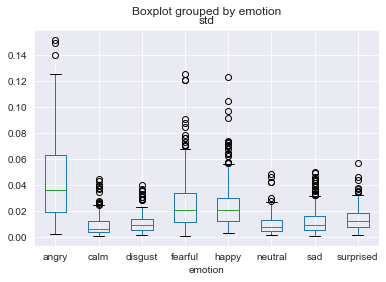

In [70]:
for column in ['min', 'max', 'std']:
    df.boxplot(column=[column])
    plt.show()
    n=len(box_outliers(df[column]))
    print(f'{column} has {n} box_outliers')
    df.boxplot(column=[column], by='emotion')
    plt.show()
    outliers(column, 'emotion')

In [71]:
to_drop.append('min')
to_drop.append('max')

In [72]:
df = df.drop(to_drop, axis=1)
df.shape

(2421, 27)

## Mapping

In [73]:
for attribute in to_map:
    # lista dei valori della colonna
    attr_values = sorted(df[attribute].unique())
    # dizionario con valori mappati
    attr_values_mapping = dict(zip(attr_values, range(0, len(attr_values) + 1)))
    # stampa per info su mappatura
    print(attr_values_mapping)
    # sostituzione
    df[attribute] = df[attribute].map(attr_values_mapping).astype(int)

{'song': 0, 'speech': 1}
{'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}
{'normal': 0, 'strong': 1}
{'Dogs are sitting by the door': 0, 'Kids are talking by the door': 1}
{'1st': 0, '2nd': 1}
{'F': 0, 'M': 1}


In [74]:
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,frame_count,intensity,zero_crossings_sum,...,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_kur,mean,std,kur,skew
0,1,3,0,0,1,0,3737,179379.0,0.098427,1.121235,...,0.674807,-0.276204,-0.734044,0.175085,0.0,-1.215025,3.844916e-07,0.014482,9.406061,0.706488
1,1,0,0,0,0,0,3904,187387.0,NaN,0.278471,...,0.264372,-0.365037,-0.706940,0.883757,0.0,-1.384174,-7.149491e-08,0.020417,19.564187,0.748262
2,0,4,1,0,1,0,4671,224224.0,0.631165,1.592681,...,0.665423,0.250018,-1.163996,0.879099,0.0,-1.242947,2.429985e-06,0.024317,4.881241,0.771346
3,1,7,0,1,0,0,3637,174575.0,-1.348146,-0.346031,...,0.297811,-0.707183,-0.830636,1.227493,0.0,-1.445318,2.373929e-07,0.003561,13.040259,-0.072032
4,0,4,1,0,1,0,4404,211411.0,0.758500,0.614322,...,0.628032,0.418192,-0.725278,0.811169,0.0,-1.366742,8.454691e-07,0.027522,7.485109,1.018009


# Saving the results

In [75]:
n_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows is {n_duplicates}')

Number of duplicate rows is 0


In [76]:
df.to_csv('dataset/preprocessed_dataset.csv', index=False)